## This is the second stage of the CORDIS keywordsearch analysis that includes categorization of the obtained term ngrams with further analysis.

1. Tagged terms preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pip install wordcloud 

In [2]:
%store -r df_BOW_bigram

In [3]:
%store -r results_keywordSearch

In [4]:
df_BOW_bigram.head(5)

,abreast research,abridg eu,abrupt transit,abundantli dure,academ advisor,academ appli,academ background,academ boundari,academ center,academ circl,...,żurawlów similar,żurawlów villag,ʽdi aggreg,ʽresourc disaggregationʼ,ʽsoftwarizationʼ migrat,ιτ celj,μm formul,μmole prototyp,σiderwin propos,τo address
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Importing our manualy tagged bigram terms table

In [5]:
df_categories_terms = pd.read_csv('../data/bi-grams_classified_2.csv')
#df_categories['SubCategory 1'].astype(float)
classifier_subcateg = pd.read_csv('../data/classifier_types.csv')

In out classification we have a **subcategories** (starting as **id 11,.. ,21.. ,31.. ,41..**) and they are grouped in **categories of upper layer** with id **1 2 3 4**. 

In [6]:
cat_1 = [11,12,13,14]
cat_2 = [21,22,23,24]
cat_3 = [31,32,33,34]
cat_4 = [41,42,43,44]

In [7]:
df_categories_terms.head(5)

,Column1,SubCategory 1,SubCategory 2,SubCategory 3
0,energi effici,11,21.0,42.0
1,energi consumpt,11,21.0,NaN
2,renew energi,12,21.0,NaN
3,climat chang,12,42.0,NaN
4,busi model,41,NaN,NaN


In [8]:
classifier_subcateg

,id,Cathegories
0,1,Energy consumption and carbon footprint reduction
1,11,renovation and energy efficiency
2,12,GHG emissions reduction
3,13,cost efficiency (cost reduction)
4,14,heating and cooling energy demand and consumption
5,2,"Low carbon, Smart Technologies"
6,21,Energy generation and RES
7,22,Energy storage
8,23,"EMS, Smart grid and Living Laboratories"
9,24,"Tech innovaton, Solution developmant, Modeling..."


Length of the tagged bigram terms list

In [9]:
len(df_categories_terms)

982

In [10]:
df_categories_terms=df_categories_terms.set_index('Column1')

Create a dictionary of terms and their categories, such as { 'energi consumpt' : [11,21], ... }

In [11]:
import math
bi_grams_dict={}
for index, row in df_categories_terms.iterrows():
    bi_grams_dict[index]= [row['SubCategory 1'].astype(int)]
    if math.isnan(row['SubCategory 2']) is False: 
        bi_grams_dict.setdefault(index, []).append(row['SubCategory 2'].astype(int))
        if math.isnan(row['SubCategory 3']) is False:
            bi_grams_dict.setdefault(index, []).append(row['SubCategory 3'].astype(int))

after that, create Dataframe which holds a bag of words only of our categorized terms

In [12]:
df_list = pd.DataFrame(index=df_BOW_bigram.index)
count =0
for i in df_categories_terms.index:
    if i in df_BOW_bigram.columns:
        df_list=df_list.join(pd.DataFrame(df_BOW_bigram[i]))
    if i not in df_BOW_bigram.columns:
        count+=1
print (count)

0


df_iterator = pd.DataFrame (index=df_BOW_bigram.index)
df_iterator['iter']=[{}]
for index,row in df_words.iterrows():
    df_iterator['iter']={index:row for index,row in df_words.iterrows()}

In [13]:
df_words = df_list.T
df_words

,58,62,135,228,325,361,428,432,441,443,...,34915,34994,35049,35065,35083,35117,35184,35210,35215,35229
energi effici,1,0,3,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
energi consumpt,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
renew energi,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
climat chang,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
busi model,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cold storag,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
market introduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
forecast climat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
forecast build,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Looking at table of projects and their mathing terms, we can extract only terms that are present (ie more than 1) for particulart project with a small function

In [14]:
def terms2dict(ind, col):
    dic_cat={}
    for index, row in df_words[col].items():    
        if row !=0:
            dic_cat[index] = row
    
    return dic_cat

Adding a bit more, we have function that:

- Takes only those terms which exist for particular project, put them into the dictionary, such as {'term': Numb of apearence}, 

- That takes this dictionary for particular project and makes a list of particular sybcategories to which each term was referred, taking into account the number of how many times word appear in project (ie if 'energi effici' appeared 3 times in prohect 135, among all we'll have a list of the list which wil include 3 times subcategories for this term, such as [[11,21],[11,21],[11,21]]

- Following that it makes this array flat, (ie. for ex: from [11,21],[11,21],[11,21]] to [11,21,11,21,11,21].
- than we transform it to numpy array, extract unique items, 
- finally by iterating through flat array weith extracted unique items we caunt the number of appearence of each item, and put it into the new dictionary in such way, in the end we have a dictionary that holds {id of subcategory : number of occurances}

We will refer to this number of occurances as a weight value of each subcategory for purticular project, sort of the *score* , that placed in additional dataframe column ['subcategories_score'] in an descending order as list of touples [(subcatedory,  score ),(.. , ..), ...], thus we can say that taking top 3 or 5 subcategories will map our project within the primary categories where it refered. 

In [15]:
from collections import Counter
import numpy as np

def lister(ind, col):
    # this piece takes only those terms for particular projects which it has (!0 appearence)
    # and put it as a dictionary
    dic_cat={}
    for index, row in df_words[col].items():    
        if row !=0:
            dic_cat[index] = row
    
    dict_cat_test=[]
    for key in dic_cat.keys():
        i=0
        if dic_cat.get(key)==1:
            dict_cat_test.append(bi_grams_dict.get(key))
        if dic_cat.get(key)>1:
            while i<dic_cat.get(key):
                dict_cat_test.append(bi_grams_dict.get(key))
                i+=1
    flat_list = [item for sublist in dict_cat_test for item in sublist]
    # this piece produce a key of subcatogory and it quantity in the list
    x = np.array(flat_list)
    unique = np.unique(x)
    dict_subcat = {}
    for i in  unique:
        dict_subcat[i]=flat_list.count(i)

    return  dict_subcat #dict_subcat_sorted 

In [16]:
#after we have a dictionary of {sub_cat: value} this function puts it in descending order by value (i.e. ranking)
def range_by_score(index, dict_subcat):
    dict_subcat_sorted = sorted(dict_subcat.items(), key=lambda x: x[1], reverse=True)
    
    return  dict_subcat_sorted 

In [17]:
df_iterator = pd.DataFrame (index=df_BOW_bigram.index)

In [18]:
df_iterator['terms_subcategories_list']=[terms2dict(index, col) for index,col in enumerate(df_words)]

In [19]:
df_iterator['subcategories']=[lister(index, col) for index,col in enumerate(df_words)]

In [20]:
df_iterator['subcategories_score']=[range_by_score(index, row) for index,row in df_iterator['subcategories'].iteritems()]

In [21]:
df_iterator.head(5)

,terms_subcategories_list,subcategories,subcategories_score
58,"{'energi effici': 1, 'energi consumpt': 1, 're...","{11: 12, 12: 1, 13: 1, 14: 4, 21: 8, 22: 5, 23...","[(11, 12), (23, 10), (21, 8), (22, 5), (14, 4)..."
62,"{'energi save': 1, 'long term': 2, 'busi plan'...","{11: 1, 13: 1, 14: 1, 21: 1, 23: 1, 24: 2, 31:...","[(31, 5), (41, 3), (42, 3), (24, 2), (11, 1), ..."
135,"{'energi effici': 3, 'energi consumpt': 1, 'en...","{11: 8, 12: 1, 14: 1, 21: 6, 23: 3, 24: 1, 31:...","[(11, 8), (31, 7), (42, 7), (21, 6), (23, 3), ..."
228,"{'energi effici': 1, 'energi consumpt': 1, 're...","{11: 7, 12: 3, 13: 1, 14: 3, 21: 18, 22: 1, 23...","[(21, 18), (11, 7), (31, 5), (12, 3), (14, 3),..."
325,"{'busi model': 1, 'larg scale': 1, 'decis make...","{23: 1, 24: 3, 31: 1, 32: 3, 34: 3, 41: 1, 42:...","[(42, 4), (24, 3), (32, 3), (34, 3), (23, 1), ..."


In [22]:
df_iterator['1st_subcategoty']=[row[0][0] if bool(row) is True else ''
                                for index, row in df_iterator['subcategories_score'].iteritems()]

In [23]:
df_iterator.head(10)

,terms_subcategories_list,subcategories,subcategories_score,1st_subcategoty
58,"{'energi effici': 1, 'energi consumpt': 1, 're...","{11: 12, 12: 1, 13: 1, 14: 4, 21: 8, 22: 5, 23...","[(11, 12), (23, 10), (21, 8), (22, 5), (14, 4)...",11
62,"{'energi save': 1, 'long term': 2, 'busi plan'...","{11: 1, 13: 1, 14: 1, 21: 1, 23: 1, 24: 2, 31:...","[(31, 5), (41, 3), (42, 3), (24, 2), (11, 1), ...",31
135,"{'energi effici': 3, 'energi consumpt': 1, 'en...","{11: 8, 12: 1, 14: 1, 21: 6, 23: 3, 24: 1, 31:...","[(11, 8), (31, 7), (42, 7), (21, 6), (23, 3), ...",11
228,"{'energi effici': 1, 'energi consumpt': 1, 're...","{11: 7, 12: 3, 13: 1, 14: 3, 21: 18, 22: 1, 23...","[(21, 18), (11, 7), (31, 5), (12, 3), (14, 3),...",21
325,"{'busi model': 1, 'larg scale': 1, 'decis make...","{23: 1, 24: 3, 31: 1, 32: 3, 34: 3, 41: 1, 42:...","[(42, 4), (24, 3), (32, 3), (34, 3), (23, 1), ...",42
361,"{'low energi': 1, 'innov solut': 1, 'energi co...","{11: 1, 14: 1, 23: 1, 24: 2, 31: 3, 33: 2, 34:...","[(31, 3), (24, 2), (33, 2), (34, 2), (11, 1), ...",31
428,"{'climat chang': 1, 'busi model': 1, 'develop ...","{12: 1, 24: 3, 31: 8, 32: 1, 34: 1, 41: 1, 42:...","[(31, 8), (24, 3), (42, 3), (12, 1), (32, 1), ...",31
432,"{'energi storag': 3, 'high perform': 1, 'therm...","{11: 2, 14: 14, 21: 5, 22: 4, 23: 6, 24: 2, 32...","[(14, 14), (23, 6), (21, 5), (22, 4), (32, 3),...",14
441,"{'energi consumpt': 1, 'energi save': 1, 'ener...","{11: 4, 12: 1, 13: 1, 14: 2, 21: 4, 22: 1, 23:...","[(11, 4), (21, 4), (23, 4), (31, 3), (14, 2), ...",11
443,"{'energi effici': 1, 'energi consumpt': 1, 'lo...","{11: 6, 12: 1, 13: 3, 21: 7, 22: 2, 31: 10, 32...","[(31, 10), (21, 7), (11, 6), (13, 3), (34, 3),...",31


In [24]:
def subcategories(row):
    list = []
    i=0
    while i<len(row):
        list.append(row[i][0])
        i+=1
    return list

In [25]:
df_iterator['list_subcategories']=[subcategories(row) 
                                for index, row in df_iterator['subcategories_score'].iteritems()]

In [26]:
df_iterator['list_subcategories']

58       [11, 23, 21, 22, 14, 31, 34, 42, 24, 12, 13, 3...
62            [31, 41, 42, 24, 11, 13, 14, 21, 23, 32, 34]
135           [11, 31, 42, 21, 23, 33, 12, 14, 24, 32, 34]
228       [21, 11, 31, 12, 14, 42, 23, 24, 33, 34, 13, 22]
325                       [42, 24, 32, 34, 23, 31, 41, 44]
                               ...                        
35117             [21, 11, 23, 14, 22, 42, 24, 31, 32, 34]
35184                     [23, 24, 22, 42, 12, 14, 21, 31]
35210                                 [31, 42, 12, 23, 43]
35215                                 [12, 14, 21, 23, 42]
35229                         [24, 14, 11, 21, 34, 42, 44]
Name: list_subcategories, Length: 1229, dtype: object

In [27]:
import numpy as np

matrix=np.array([[16,  3, 28,  0, 18],
                 [18,  0, 12,  5, 29],
                 [ 9, 11, 17, 27,  0],
                 [19,  0, 31, 11, 12],
                 [23, 17, 10,  0, 34]], dtype=int)

def check_data(data_matrix):
    L, M=data_matrix.shape
    if L!=M:
        raise ValueError('Data array must have (n,n) shape')
    return L

L=check_data(matrix)

In [28]:
def main_category(index, row):
    s=0
    if row in cat_1:
        s=1#"Energy consumption and carbon footprint reduction" 
    if row in cat_2:
        s=2#"Low carbon, Smart Technologies"
    if row in cat_3:
        s=3#"Social Economy and Humanities"
    if row in cat_4:
        s=4# "Policy, Government, Strategy"
    return s

In [29]:
df_iterator['Main_categoty'] = [main_category(index,row) for index,row in df_iterator['1st_subcategoty'].iteritems()]

In [30]:
df_iterator.head(10)

,terms_subcategories_list,subcategories,subcategories_score,1st_subcategoty,list_subcategories,Main_categoty
58,"{'energi effici': 1, 'energi consumpt': 1, 're...","{11: 12, 12: 1, 13: 1, 14: 4, 21: 8, 22: 5, 23...","[(11, 12), (23, 10), (21, 8), (22, 5), (14, 4)...",11,"[11, 23, 21, 22, 14, 31, 34, 42, 24, 12, 13, 3...",1
62,"{'energi save': 1, 'long term': 2, 'busi plan'...","{11: 1, 13: 1, 14: 1, 21: 1, 23: 1, 24: 2, 31:...","[(31, 5), (41, 3), (42, 3), (24, 2), (11, 1), ...",31,"[31, 41, 42, 24, 11, 13, 14, 21, 23, 32, 34]",3
135,"{'energi effici': 3, 'energi consumpt': 1, 'en...","{11: 8, 12: 1, 14: 1, 21: 6, 23: 3, 24: 1, 31:...","[(11, 8), (31, 7), (42, 7), (21, 6), (23, 3), ...",11,"[11, 31, 42, 21, 23, 33, 12, 14, 24, 32, 34]",1
228,"{'energi effici': 1, 'energi consumpt': 1, 're...","{11: 7, 12: 3, 13: 1, 14: 3, 21: 18, 22: 1, 23...","[(21, 18), (11, 7), (31, 5), (12, 3), (14, 3),...",21,"[21, 11, 31, 12, 14, 42, 23, 24, 33, 34, 13, 22]",2
325,"{'busi model': 1, 'larg scale': 1, 'decis make...","{23: 1, 24: 3, 31: 1, 32: 3, 34: 3, 41: 1, 42:...","[(42, 4), (24, 3), (32, 3), (34, 3), (23, 1), ...",42,"[42, 24, 32, 34, 23, 31, 41, 44]",4
361,"{'low energi': 1, 'innov solut': 1, 'energi co...","{11: 1, 14: 1, 23: 1, 24: 2, 31: 3, 33: 2, 34:...","[(31, 3), (24, 2), (33, 2), (34, 2), (11, 1), ...",31,"[31, 24, 33, 34, 11, 14, 23, 41, 42, 44]",3
428,"{'climat chang': 1, 'busi model': 1, 'develop ...","{12: 1, 24: 3, 31: 8, 32: 1, 34: 1, 41: 1, 42:...","[(31, 8), (24, 3), (42, 3), (12, 1), (32, 1), ...",31,"[31, 24, 42, 12, 32, 34, 41, 43]",3
432,"{'energi storag': 3, 'high perform': 1, 'therm...","{11: 2, 14: 14, 21: 5, 22: 4, 23: 6, 24: 2, 32...","[(14, 14), (23, 6), (21, 5), (22, 4), (32, 3),...",14,"[14, 23, 21, 22, 32, 11, 24, 34, 44]",1
441,"{'energi consumpt': 1, 'energi save': 1, 'ener...","{11: 4, 12: 1, 13: 1, 14: 2, 21: 4, 22: 1, 23:...","[(11, 4), (21, 4), (23, 4), (31, 3), (14, 2), ...",11,"[11, 21, 23, 31, 14, 32, 34, 44, 12, 13, 22, 24]",1
443,"{'energi effici': 1, 'energi consumpt': 1, 'lo...","{11: 6, 12: 1, 13: 3, 21: 7, 22: 2, 31: 10, 32...","[(31, 10), (21, 7), (11, 6), (13, 3), (34, 3),...",31,"[31, 21, 11, 13, 34, 22, 12, 32, 41, 42]",3


save some columns

In [31]:
main_cat=df_iterator['Main_categoty']
main_cat.to_csv('../data/main_cat.csv')

In [32]:
chord_diagram=df_iterator[['list_subcategories', '1st_subcategoty']]
chord_diagram.to_csv('../data/chord_diagram.csv')

We will remove the projects that were not categorised  (i.e rowth of particular index)

In [33]:
print('Total number of keywordsearch projects: {}'.format(len(df_iterator)))

print('Number of non categorized projects: {}'.format(len(df_iterator[df_iterator['1st_subcategoty'] == ''])))
df_iterator=df_iterator[df_iterator['1st_subcategoty'] != '']
print('Resulting number of categorized projects: {}'.format(len(df_iterator[df_iterator['1st_subcategoty'] != ''])))

Total number of keywordsearch projects: 1229
Number of non categorized projects: 5
Resulting number of categorized projects: 1224


we create a projects' subcategories ranking matrix, holding the matching score, where subcategories-rows, projects' indexes-columns

at first, small function that will map transferred **i** variable (that holds a id of subcategory) check it within the dictionary of df_iterator['subcategories'] and if it also exist there, it will return a score for particular project into the matrix df_subcat_matrix

In [34]:
def subcat_matrix(i, row):
    score=0
    for n in row.keys():
        if n==i:
            score=row.get(n)# list.append(row.get(n))
        else:
            continue
    return score

In [35]:
sub_cat_1 = [11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44]
df_subcat_matrix=pd.DataFrame(index=df_iterator.index)
for i in sub_cat_1:
    df_subcat_matrix[i]=[subcat_matrix(i,row) for index,row in df_iterator['subcategories'].iteritems() ]

In [36]:
df_subcat_matrix.head(5)

,11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44
58,12,1,1,4,8,5,10,2,4,1,1,3,1,3,1,1
62,1,0,1,1,1,0,1,2,5,1,0,1,3,3,0,0
135,8,1,0,1,6,0,3,1,7,1,2,1,0,7,0,0
228,7,3,1,3,18,1,2,2,5,0,2,2,0,3,0,0
325,0,0,0,0,0,0,1,3,1,3,0,3,1,4,0,1


save matrix as matrix_project_subcat.csv

In [37]:
df_subcat_matrix.to_csv('../data/matrix_project_subcat.csv')


In [38]:
df_subcat_matrix_transp=df_subcat_matrix.T
df_subcat_matrix_transp.style.background_gradient(cmap="flare")

THIS IS THE END. DOWNWARDS THERE ARE JUST DRAFTS FOR PLOTTING 

## Simple Visualization

In [39]:
results_keywordSearch['startyear'] = pd.DatetimeIndex(results_keywordSearch['startDate']).year

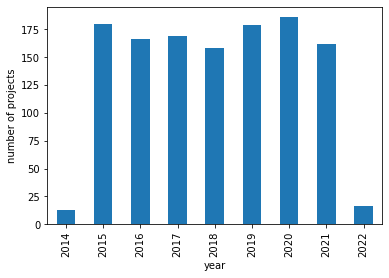

In [40]:
results_keywordSearch['startyear'].value_counts().sort_index().plot.bar(xlabel='year', ylabel='number of projects')
plt.show()

In [41]:
df_iterator=df_iterator.join(pd.DataFrame(results_keywordSearch[['startyear', 'ecMaxContribution', 'title', 'objective']]))
df_iterator.head()

,terms_subcategories_list,subcategories,subcategories_score,1st_subcategoty,list_subcategories,Main_categoty,startyear,ecMaxContribution,title,objective
58,"{'energi effici': 1, 'energi consumpt': 1, 're...","{11: 12, 12: 1, 13: 1, 14: 4, 21: 8, 22: 5, 23...","[(11, 12), (23, 10), (21, 8), (22, 5), (14, 4)...",11,"[11, 23, 21, 22, 14, 31, 34, 42, 24, 12, 13, 3...",1,2019,7537745.07,Minimal Size Thermal and Electrical Energy Sto...,The EU building stock has large potential to i...
62,"{'energi save': 1, 'long term': 2, 'busi plan'...","{11: 1, 13: 1, 14: 1, 21: 1, 23: 1, 24: 2, 31:...","[(31, 5), (41, 3), (42, 3), (24, 2), (11, 1), ...",31,"[31, 41, 42, 24, 11, 13, 14, 21, 23, 32, 34]",3,2017,6997273.75,TEchnology TRAnsfer via Multinational Applicat...,The major objective of TETRAMAX is to provide ...
135,"{'energi effici': 3, 'energi consumpt': 1, 'en...","{11: 8, 12: 1, 14: 1, 21: 6, 23: 3, 24: 1, 31:...","[(11, 8), (31, 7), (42, 7), (21, 6), (23, 3), ...",11,"[11, 31, 42, 21, 23, 33, 12, 14, 24, 32, 34]",1,2015,2032528.75,NATural Language Energy for Promoting CONSUMER...,Residential energy consumption represents the ...
228,"{'energi effici': 1, 'energi consumpt': 1, 're...","{11: 7, 12: 3, 13: 1, 14: 3, 21: 18, 22: 1, 23...","[(21, 18), (11, 7), (31, 5), (12, 3), (14, 3),...",21,"[21, 11, 31, 12, 14, 42, 23, 24, 33, 34, 13, 22]",2,2018,50000.00,Roof top wind turbine for urban areas,High electricity prices and the lowering costs...
325,"{'busi model': 1, 'larg scale': 1, 'decis make...","{23: 1, 24: 3, 31: 1, 32: 3, 34: 3, 41: 1, 42:...","[(42, 4), (24, 3), (32, 3), (34, 3), (23, 1), ...",42,"[42, 24, 32, 34, 23, 31, 41, 44]",4,2016,18656102.41,Smart Transition of EU cities towards a new co...,mySMARTLife project aims at the development of...


In [42]:
df_subcat_matrix_join=df_subcat_matrix.join(pd.DataFrame(results_keywordSearch[['count_keywords_mathes','acronym','startDate','endDate','durationM', 'ecMaxContribution', 'title', 'objective']]))

In [43]:
df_subcat_matrix_join=df_subcat_matrix_join.join(df_iterator['Main_categoty'])

In [44]:
df_subcat_matrix_join.head(5)

,11,12,13,14,21,22,23,24,31,32,...,44,count_keywords_mathes,acronym,startDate,endDate,durationM,ecMaxContribution,title,objective,Main_categoty
58,12,1,1,4,8,5,10,2,4,1,...,1,4,MiniStor,2019-11-01,2024-04-30,54.0,7537745.07,Minimal Size Thermal and Electrical Energy Sto...,The EU building stock has large potential to i...,1
62,1,0,1,1,1,0,1,2,5,1,...,0,2,TETRAMAX,2017-09-01,2021-12-31,52.0,6997273.75,TEchnology TRAnsfer via Multinational Applicat...,The major objective of TETRAMAX is to provide ...,3
135,8,1,0,1,6,0,3,1,7,1,...,0,3,NATCONSUMERS,2015-05-01,2017-06-30,26.0,2032528.75,NATural Language Energy for Promoting CONSUMER...,Residential energy consumption represents the ...,1
228,7,3,1,3,18,1,2,2,5,0,...,0,4,EOLI FPS,2018-05-01,2018-08-31,4.0,50000.00,Roof top wind turbine for urban areas,High electricity prices and the lowering costs...,2
325,0,0,0,0,0,0,1,3,1,3,...,1,5,mySMARTLife,2016-12-01,2021-11-30,60.0,18656102.41,Smart Transition of EU cities towards a new co...,mySMARTLife project aims at the development of...,4


In [45]:
df_subcat_matrix_join.to_csv('../data/matrix_visualisation.csv')

In [46]:
df_cat_years=pd.DataFrame(df_iterator.groupby(['startyear', 'Main_categoty']).size()).rename(columns={0:'quantity'})

df_cat_year_pivoted = df_cat_years.pivot_table(index='startyear', columns=['Main_categoty'],values='quantity')
df_cat_year_pivoted

Main_categoty,1,2,3,4
startyear,,,,
2014,6,4,2,1
2015,51,78,29,22
2016,47,74,23,22
2017,48,84,20,16
2018,35,74,27,22
2019,54,81,28,14
2020,29,94,34,28
2021,47,61,36,18
2022,2,9,1,3


pie_plot=results_keywordSearch['durationM'].value_counts().sort_index().plot.pie(figsize=(7, 7))
pie_plot.legend(fontsize = 10)
pie_plot.get_legend().set_bbox_to_anchor((1, 1))

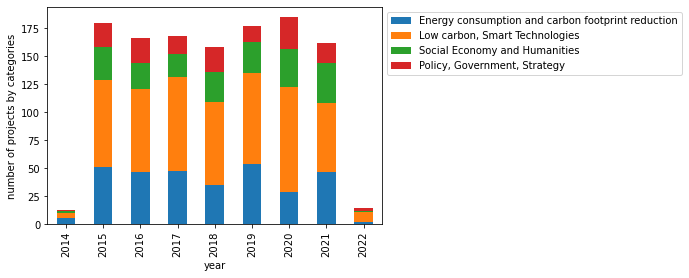

In [47]:
df_cat_year_pivoted.plot.bar(stacked=True, xlabel='year', ylabel='number of projects by categories')
plt.legend(["Energy consumption and carbon footprint reduction", "Low carbon, Smart Technologies", 
            "Social Economy and Humanities","Policy, Government, Strategy"], bbox_to_anchor=(1.0, 1.0))

An empty column is a number of projects where there was no bi-gram term found from our list of categorized terms, thus they don't have a category, but are present in a DataFrame. such as project with index [825]

In [48]:
df_year_project=pd.DataFrame(df_iterator['startyear'].value_counts().sort_index())
df_year_project_eucontrib= df_year_project.join(pd.DataFrame(df_iterator.groupby('startyear').sum().astype(int) ['ecMaxContribution']))
df_year_project_eucontrib.rename(columns={'startyear': 'projects quantity'})

,projects quantity,ecMaxContribution
2014,13,17251277
2015,180,557645773
2016,166,565369405
2017,168,454641068
2018,158,409666009
2019,177,541818283
2020,185,711641396
2021,162,627464497
2022,15,70287118


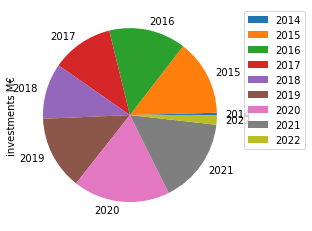

In [49]:
df_cat_euContr=df_iterator.groupby('startyear').sum().astype(int) ['ecMaxContribution']
df_cat_euContr.plot.pie(subplots=True, xlabel='year', ylabel='investments M€', legend=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))

<AxesSubplot:xlabel='year', ylabel='investments M€'>

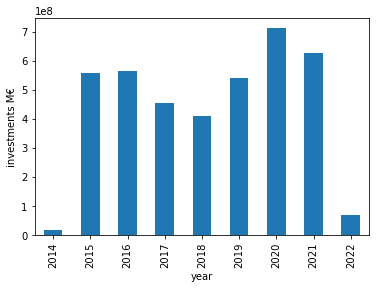

In [50]:
df_cat_euContr.plot.bar(xlabel='year', ylabel='investments M€')

In [4]:
unigrams_cloud = pd.read_csv('../data/ngrams/unigrams_tfidf_lemanized.csv')
bigrams_cloud = pd.read_csv('../data/ngrams/bigrams_tfidf_lemanized.csv')
trigrams_cloud = pd.read_csv('../data/ngrams/trigrams_tfidf.csv')

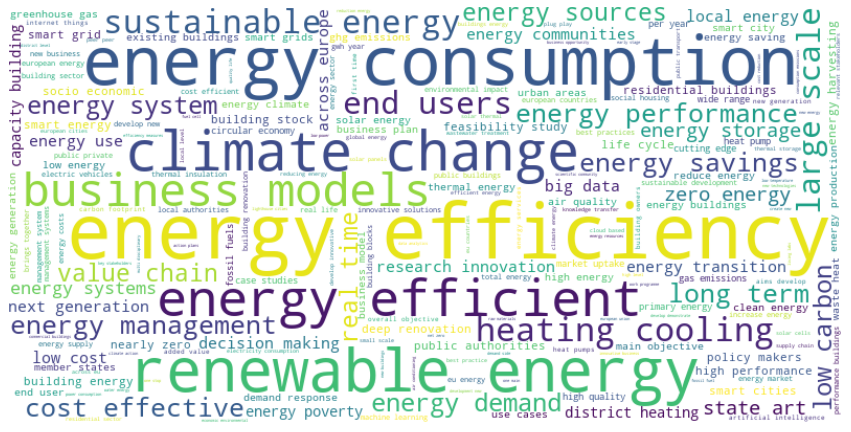

In [5]:
from wordcloud import WordCloud
d = {}
for a, x in bigrams_cloud.values:
    d[a] = x
wordcloud = WordCloud(background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

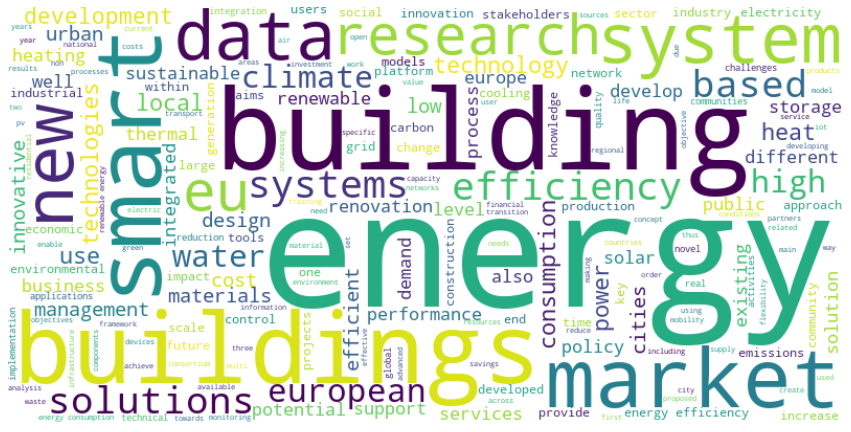

In [7]:
for a, x in unigrams_cloud.values:
    d[a] = x
wordcloud_uni = WordCloud(background_color="white", width=800, height=400)
wordcloud_uni.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_uni, interpolation="bilinear")
plt.axis("off")
plt.show()

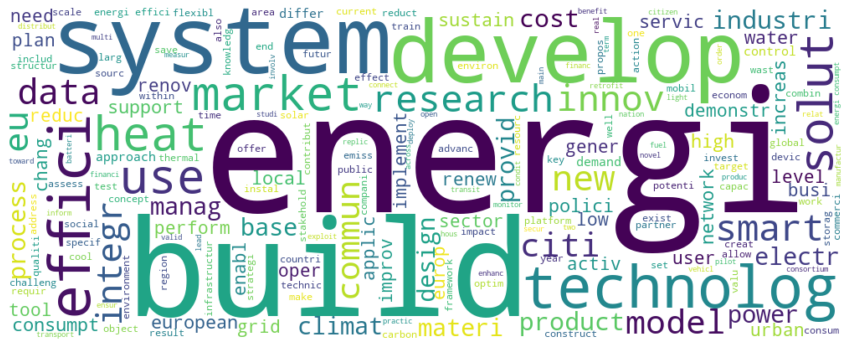

In [6]:
for a, x in trigrams_cloud.values:
    d[a] = x
wordcloud_tri = WordCloud(background_color="white", width=1000, height=400)
wordcloud_tri.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_tri, interpolation="bilinear")
plt.axis("off")
plt.show()